<a href="https://colab.research.google.com/github/Franma07/EIE401/blob/main/Actividades/Actividad_1_MartinezFrance_Franma07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>

<center><h2>Actividad 1</h2></center>
<center><h3>Fundamentos</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: France Martínez</h3></center>
<center><h5>Pontificia Universidad Católica de Valparaíso</h5></center>

## 1. Crea tu perfil y un repositorio para las actividades del curso en Github
<p align="justify">
Tanto en el mercado laboral como a nivel de investigación científica, se ha normalizado el uso de herramientas de desarrollo continuo (CI/CD), entre las que se cuenta a GitHub.

<p align="justify">
Debes crear tu cuenta y primer repositorio en GitHub.

El respositorio deberá tener un archivo README y subcarpetas para las actividades del semestre. Allí deberás alojar el archivo de Jupyter Notebook con el código y todos los recursos para la posterior revisión de tu trabajo.
    
Este medio será el canal de entrega de tus actividades cada semana, de tal forma que al final del curso debes tener un portafolio de tu trabajo para presentar a tus colegas o en la industria.

In [ ]:
# Franma07
# https://github.com/Franma07/EIE401

## 2. Define en python vectores y funciones
<p align="justify">
Debes generar vectores que representan intervalos de tiempo o de una variable.
Debes ingresar las funciones matemáticas y evaluarlas en los vectores generados.

$$
f(x) =  e^{-x^2}
$$

$$
f(z) =  ysin(x)
$$

<p align="justify">
Haz una gráfica para cada uno de las funciones evaluadas.

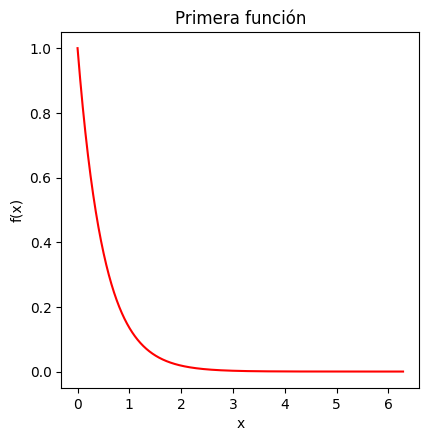

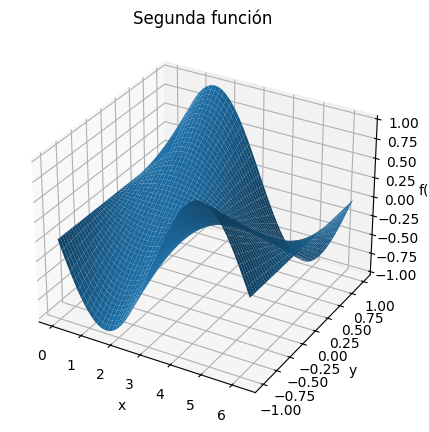

In [ ]:
import numpy as np                # Se importan bibliotecas básicas, para operaciones y gráficos
import matplotlib.pyplot as plt

x = np.linspace(0,2*np.pi,1000)   # Se crea un vector de 1 hasta a 0, con 1000 muestras
y = np.linspace(-1,1,1000)        # Se asume un valor de y, otro vector
X, Y = np.meshgrid(x,y)           # Se crea una malla para generar figura en 3D
f1 = np.exp(-x)**2                # Se define la primera función matemática
f2 = Y*np.sin(X)                  # Se define la segunda función matemática

plt.figure(figsize=(4.62,4.62))      # Se crea la primera figura, para la primera función
plt.plot(x,f1,'r')                # Se plotea la figura, línea de color rojo
plt.xlabel('x')                   # Nombre a eje x
plt.ylabel('f(x)')                # Nombre a eje y
plt.title('Primera función')      # Titulo
plt.show()                        # Se muestra la gráfica

plt.figure(figsize=(10,5))        # Se crea segunda figura
ax = plt.axes(projection='3d')    # Se hace proyección 3D
ax.plot_surface(X,Y,f2)           # Se plotea la superficie en 3D
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(z)')
plt.title('Segunda función')
plt.show()                        # Se muestra la gráfica

Para las gráficas se asumieron distintos parámetros, para poder gráficar correctamente las señales.

## 3. Ruido
<p align="justify">
Crear una señal (senoidal, cosenoidal, etc) y demuestra la agregación de ruido.

El ruido gaussiano es un ruido estadistico donde su distribución de valores sigue una distribución normal. La mayoria de los valores se encuentran cerca de la media, con una dispersión dada por la desviación estandar.

Esto quiere decir que el ruido gaussiano tiene una distribución simétrica, con forma de campana cerca de la media.

Es el tipo de ruido más común, se puede ver en sensores, aparatos de teleco e imagenes.

A continuación se gráfica la señal senoidal y la misma señal, pero con ruido. Algunos valores se pueden modificar a gusto (Parametros de la señal y parametros del ruido)

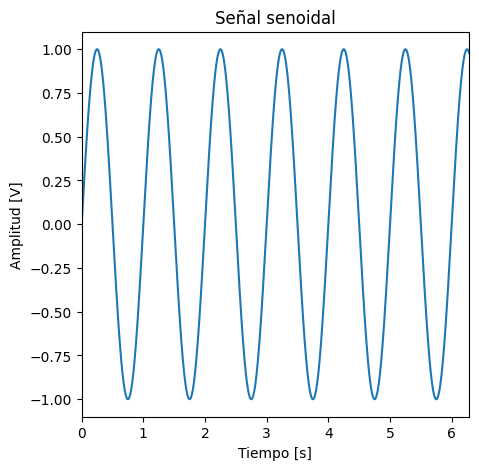

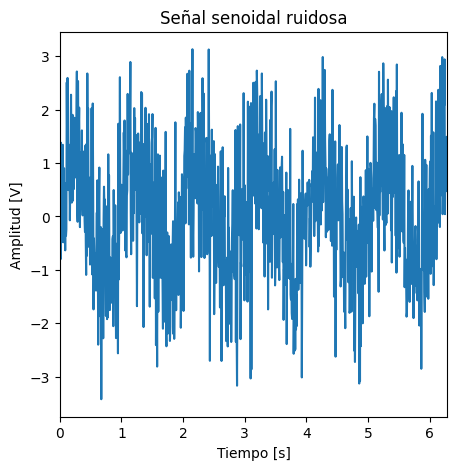

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

muestras = 1000
t = np.linspace(0,2*np.pi,muestras)       # Vector de tiempo [s]
A = 1                                     # Amplitud de la señal [V]
f = 1                                     # frecuencia [Hz]
fase = 0                                  # [rad]
offset = 0                                # [V]
senal = A*np.sin(2*np.pi*f*t + fase) + offset  # Ecuación de una señal senosoidal

plt.figure(figsize=(5,5))                 # Se gráfica la señal sin ruido
plt.plot(t,senal)
plt.xlim(0,2*np.pi)
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.title('Señal senoidal')
plt.show()

media = 0                                 # Media de la distribución gaussiana
desviacion = 1                            # Desviación estandar del ruido
ruido = np.random.normal(media,desviacion,muestras)      # Ruido gaussiano
senal_ruidosa = senal + ruido             # Se le suma ruido a la señal

plt.figure(figsize=(5,5))                 # Se gráfica la señal con ruido
plt.plot(t,senal_ruidosa)
plt.xlim(0,2*np.pi)
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.title('Señal senoidal ruidosa')
plt.show()

### 3.2 Ruido Rosa
Investiga en que consiste el ruido rosa, cual es la diferencia del ruido gaussiano y demuéstralo.

El ruido rosa es un ruido que su potencia disminuye a medida que aumenta la frecuencia, sigue una relación de tipo 1/f.
El ruido rosa tiene más energía en frecuencias bajas y menos en frecuencias altas, a diferencia del ruido gaussiano que su densidad espectral es uniforme en todas las frecuencias.

Para el ruido rosa la potencia se reduce 3 dB por octava.

Se encuentra en señales biologicas, música y fenomenos naturales. Algunos ejemplos pueden ser: el sonido de la lluvia, el sonido de las olas del mar al llegar a la orilla de la playa, el sonido de las hojas de los arboles al caer cuando hay viento.

Como se puede notar son ruido agradables al oido humano, por lo que el ruido rosa tiende a relajar el cerebro o incluso puede ayudar a conciliar el sueño.

Ya que en el ruido rosa las bajas frecuencias tienen más energía que las frecuencias más altas se procede a explicar con un código, calculando la transformada de Fourier para analizar su espectro de frecuencia.

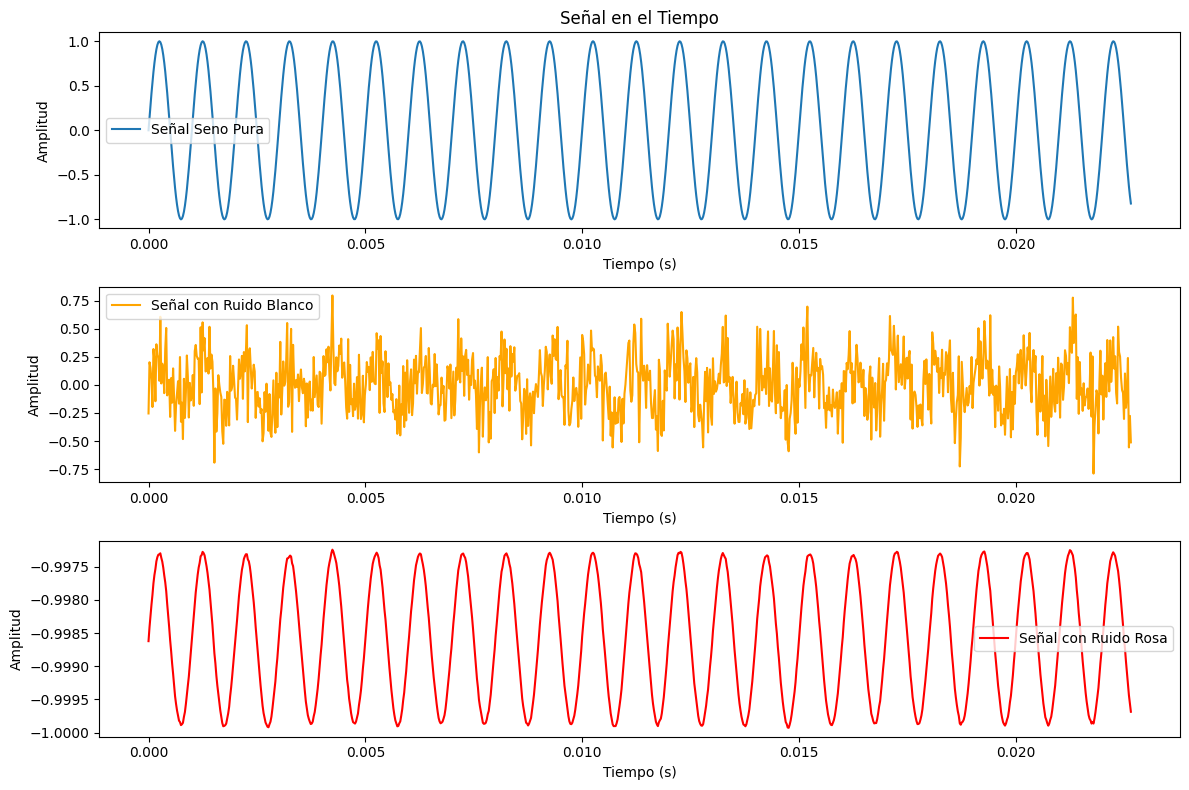

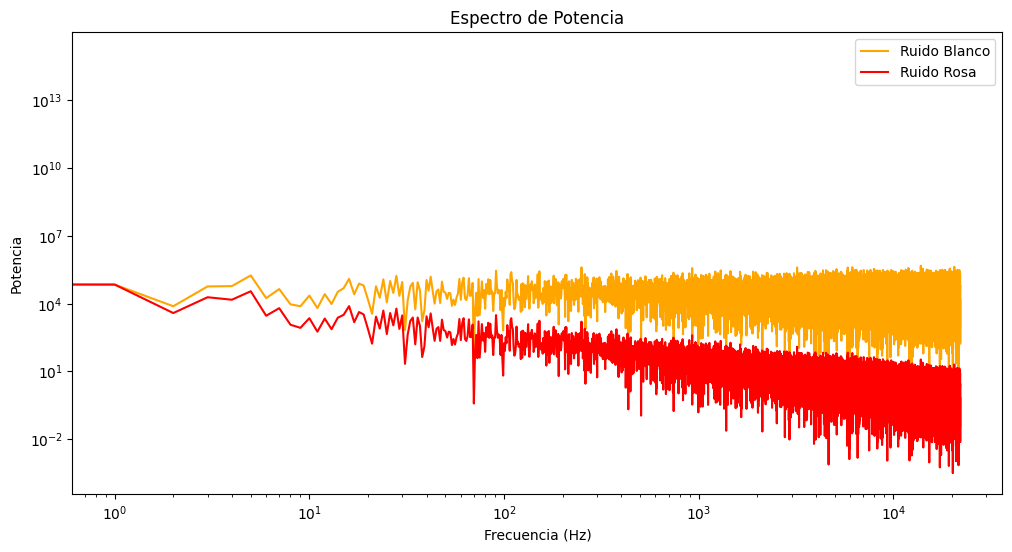

In [23]:
import numpy as np
import matplotlib.pyplot as plt

fs = 44100  # Frecuencia de muestreo (Hz)
duracion = 1  # Duración en segundos
n = fs * duracion  # Número de muestras
t = np.linspace(0, duracion, n)  # Vector de tiempo

frecuencia_seno = 1000  # Frecuencia de la onda (Hz). Cambiar el valor para ver el efecto del ruido rosa (Altas frecuencias menor ruido...)
senal_seno = np.sin(2 * np.pi * frecuencia_seno * t)

ruido_blanco = np.random.normal(0, 1, n) # Ruido gaussiano (blanco)

# Calcular el espectro del ruido blanco y ruido rosa
frecuencias = np.fft.rfftfreq(n, 1/fs)
filtro = 1 / np.sqrt(frecuencias + 1e-10)  # Filtro para reducir la amplitud en altas frecuencias
ruido_blanco_fft = np.fft.rfft(ruido_blanco)  # FFT de ruido blanco
ruido_rosa_fft = ruido_blanco_fft * filtro    # FFT de ruido rosa
ruido_rosa = np.fft.irfft(ruido_rosa_fft, n=n) # Transformada inversa, para volver al dominio del tiempo

# Señales con ruido
senal_con_ruido_blanco = senal_seno + ruido_blanco
senal_con_ruido_rosa = senal_seno + ruido_rosa

# Se normaliza para tomar amplitudes similares
senal_con_ruido_blanco /= np.max(np.abs(senal_con_ruido_blanco))
senal_con_ruido_rosa /= np.max(np.abs(senal_con_ruido_rosa))

# Espectros de las señales
espectro_blanco = np.abs(np.fft.rfft(ruido_blanco))**2
espectro_rosa = np.abs(np.fft.rfft(ruido_rosa))**2

plt.figure(figsize=(12, 8))

# Señales en el dominio del tiempo
plt.subplot(3, 1, 1)
plt.plot(t[:1000], senal_seno[:1000], label="Señal Seno Pura")
plt.title("Señal en el Tiempo")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t[:1000], senal_con_ruido_blanco[:1000], label="Señal con Ruido Blanco", color='orange')
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t[:1000], senal_con_ruido_rosa[:1000], label="Señal con Ruido Rosa", color='red')
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()

plt.tight_layout()
plt.show()

# Espectro de potencia
plt.figure(figsize=(12, 6))
plt.loglog(frecuencias, espectro_blanco, label="Ruido Blanco", color='orange')
plt.loglog(frecuencias, espectro_rosa, label="Ruido Rosa", color='red')
plt.title("Espectro de Potencia")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Potencia")
plt.legend()
plt.show()

Como se puede ver en las gráficas, la potencia del ruido rosa decrece a medida que aumenta la frecuencia, mientras que el ruido blanco se mantiene constante a medida que aumentan las frecuencias.

Cambiar la frecuencia de la señal seno entre 1, 10, 100 y 1000 Hz para ver como afecta la frecuencia a los 2 ruidos.

## 4. Referencias
<p align="justify">
    
[Generate colors of noise in Python] https://stackoverflow.com/questions/67085963/generate-colors-of-noise-in-python

[Generación de señales]https://medium.com/@martinkarlsson.io/fourier-transform-in-python-f15b3243ce9a

[Fourier Transform]https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.04-FFT-in-Python.html

[SciPy] https://docs.scipy.org/doc/scipy/tutorial/fft.html

[Fourier con numpy] https://towardsdatascience.com/fourier-transform-the-practical-python-implementation-acdd32f1b96a